In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### 1. Loading data

In [2]:
# Read data
prev_apps = pd.read_csv('previous_application.csv')

In [3]:
prev_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prev_apps.shape

(1670214, 37)

In [5]:
cur_apps = pd.read_csv('application_data.csv')

In [6]:
cur_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cur_apps.shape

(307511, 122)

### 2. Merge data into single dataframe

In [8]:
all_apps = cur_apps.merge(prev_apps, how='left', on='SK_ID_CURR', suffixes=(None, '_PREV'))

In [9]:
all_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [10]:
all_apps.shape

(1430155, 158)

### 3. Missing values

In [11]:
all_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


In [12]:
all_apps.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)

In [13]:
# Store variables
cols = all_apps.columns
sz = all_apps.shape[0]

In [14]:
na_df = pd.DataFrame(columns=['name', 'null count', 'null percent', 'type'])

for col in cols:
    na_sum = all_apps[col].isna().sum()
    if na_sum != 0:
        na_percent = na_sum / sz * 100
        na_df = na_df.append({'name': col, 'null count': na_sum, 'type': all_apps[col].dtype, 'null percent': na_percent}, ignore_index=True)



In [15]:
na_df.sort_values(by='null percent', ascending=False, inplace=True)

In [16]:
na_df

,name,null count,null percent,type
79,RATE_INTEREST_PRIMARY,1425364,99.665001,float64
80,RATE_INTEREST_PRIVILEGED,1425364,99.665001,float64
41,COMMONAREA_MEDI,995502,69.607980,float64
13,COMMONAREA_AVG,995502,69.607980,float64
27,COMMONAREA_MODE,995502,69.607980,float64
...,...,...,...,...
7,EXT_SOURCE_2,1901,0.132923,float64
1,AMT_GOODS_PRICE,1219,0.085236,float64
0,AMT_ANNUITY,93,0.006503,float64
5,CNT_FAM_MEMBERS,2,0.000140,float64


In [231]:
na_df[na_df['name'] == 'OWN_CAR_AGE']

,name,null count,null percent,type
3,OWN_CAR_AGE,947574,66.256734,float64


In [234]:
na_df[na_df['name'] == 'EXT_SOURCE_1']

,name,null count,null percent,type
6,EXT_SOURCE_1,806398,56.385357,float64


In [235]:
na_df[na_df['name'] == 'EXT_SOURCE_2']

,name,null count,null percent,type
7,EXT_SOURCE_2,1901,0.132923,float64


In [236]:
na_df[na_df['name'] == 'EXT_SOURCE_3']

,name,null count,null percent,type
8,EXT_SOURCE_3,245619,17.174292,float64


In [17]:
# na_df['name'].values[-2:]

In [18]:
# missing_y = list(filter(lambda x: x[-2:] == '_y', na_df['name'].values))

In [19]:
# missing_y

In [20]:
# na_df[na_df]

In [21]:
# na_df[na_df['name'][-2:] == '_y']

#### 3.1. Dropping columns with > 50% values missing

In [22]:
large_empty_cols = na_df[na_df['null percent'] > 50]['name'].values

In [23]:
large_empty_cols.size

38

In [24]:
type(large_empty_cols)

numpy.ndarray

In [25]:
all_apps.drop(large_empty_cols, axis=1, inplace=True)

In [26]:
# Verifying that the correct number of columns were dropped
# There were 154 before, and 34 were dropped, leaving 120.
all_apps.shape

(1430155, 120)

In [27]:
na_df[na_df.name == 'OCCUPATION_TYPE']

,name,null count,null percent,type
4,OCCUPATION_TYPE,462731,32.355304,object


### 3.2. Dropping rows for columns with < 2% values missing

In [28]:
small_empty_cols = na_df[na_df['null percent'] < 2]['name'].values

In [29]:
small_empty_cols

array(['PRODUCT_COMBINATION', 'AMT_CREDIT_PREV', 'DAYS_DECISION',
       'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CODE_REJECT_REASON', 'NAME_PRODUCT_TYPE', 'NAME_PAYMENT_TYPE',
       'CHANNEL_TYPE', 'NAME_CASH_LOAN_PURPOSE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'NAME_YIELD_GROUP', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_SELLER_INDUSTRY', 'HOUR_APPR_PROCESS_START_PREV',
       'WEEKDAY_APPR_PROCESS_START_PREV', 'AMT_APPLICATION',
       'NAME_CONTRACT_TYPE_PREV', 'SK_ID_PREV', 'SELLERPLACE_AREA',
       'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'],
      dtype=object)

In [30]:
na_df[na_df['null percent'] < 2]

,name,null count,null percent,type
96,PRODUCT_COMBINATION,16767,1.172390,object
71,AMT_CREDIT_PREV,16455,1.150575,float64
83,DAYS_DECISION,16454,1.150505,float64
88,NAME_GOODS_CATEGORY,16454,1.150505,object
87,NAME_CLIENT_TYPE,16454,1.150505,object
89,NAME_PORTFOLIO,16454,1.150505,object
85,CODE_REJECT_REASON,16454,1.150505,object
90,NAME_PRODUCT_TYPE,16454,1.150505,object
84,NAME_PAYMENT_TYPE,16454,1.150505,object
91,CHANNEL_TYPE,16454,1.150505,object


In [31]:
all_apps.shape

(1430155, 120)

In [32]:
# Drop using loop
# for col in small_empty_cols:
#     all_apps = all_apps[~all_apps[col].isna()]
    

In [33]:
all_apps.dropna(axis=0, subset=small_empty_cols, inplace=True)

In [34]:
#(1404812, 120)

In [35]:
#Verification
all_apps.shape

(1404812, 120)

### 3.3. Checking remaining columns with missing values

In [36]:
med_empty_cols = na_df[(na_df['null percent'] >= 2) & (na_df['null percent'] <= 50)]

In [37]:
med_empty_cols

,name,null count,null percent,type
29,ENTRANCES_MODE,713388,49.881866,float64
15,ENTRANCES_AVG,713388,49.881866,float64
43,ENTRANCES_MEDI,713388,49.881866,float64
86,NAME_TYPE_SUITE_PREV,711126,49.723701,object
34,LIVINGAREA_MODE,711001,49.714961,float64
20,LIVINGAREA_AVG,711001,49.714961,float64
48,LIVINGAREA_MEDI,711001,49.714961,float64
52,HOUSETYPE_MODE,710772,49.698949,object
30,FLOORSMAX_MODE,705019,49.296685,float64
16,FLOORSMAX_AVG,705019,49.296685,float64


In [38]:
all_apps.shape

(1404812, 120)

### 3.4. Imputing required missing values

We will be treating some numeric columns as categorical down the line. So, we need to impute values for those, or handle them some other way, to avoid inconsistent data.<br>
Such columns are:<br>
* OCCUPATION_TYPE
* NFLAG_INSURED_ON_APPROVAL
* CNT_PAYMENT
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_MON
* AMT_REQ_CREDIT_BUREAU_QRT
* AMT_REQ_CREDIT_BUREAU_YEAR


#### 3.4.1. Occupation type 

In [39]:
all_apps[all_apps.OCCUPATION_TYPE.isna()].OCCUPATION_TYPE.values

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [40]:
all_apps.OCCUPATION_TYPE.value_counts()

Laborers                 249831
Sales staff              150334
Core staff               117435
Managers                  94425
Drivers                   83560
High skill tech staff     48195
Accountants               41659
Medicine staff            39734
Security staff            31482
Cooking staff             28516
Cleaning staff            24178
Private service staff     12174
Low-skill Laborers         9284
Waiters/barmen staff       6086
Secretaries                5716
Realty agents              3524
HR staff                   2306
IT staff                   1679
Name: OCCUPATION_TYPE, dtype: int64

In [41]:
all_apps.OCCUPATION_TYPE.fillna('Unknown', inplace=True)

In [42]:
all_apps.OCCUPATION_TYPE.value_counts()

Unknown                  454694
Laborers                 249831
Sales staff              150334
Core staff               117435
Managers                  94425
Drivers                   83560
High skill tech staff     48195
Accountants               41659
Medicine staff            39734
Security staff            31482
Cooking staff             28516
Cleaning staff            24178
Private service staff     12174
Low-skill Laborers         9284
Waiters/barmen staff       6086
Secretaries                5716
Realty agents              3524
HR staff                   2306
IT staff                   1679
Name: OCCUPATION_TYPE, dtype: int64

#### 3.4.2. NFLAG_INSURED_ON_APPROVAL

In [43]:
all_apps.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    567087
1.0    280281
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [44]:
all_apps[all_apps.NFLAG_INSURED_ON_APPROVAL.isna()]['NFLAG_INSURED_ON_APPROVAL'].values

array([nan, nan, nan, ..., nan, nan, nan])

Since this is a flag, it doesn't make sense to impute it with an 'Unknown' value. So, imputing with mode.

In [45]:
mode_val = all_apps.NFLAG_INSURED_ON_APPROVAL.mode()[0]

In [46]:
all_apps.NFLAG_INSURED_ON_APPROVAL.fillna(mode_val, inplace=True)

In [47]:
all_apps.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    1124531
1.0     280281
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

#### 3.4.3. CNT_PAYMENT

In [48]:
all_apps.CNT_PAYMENT.value_counts()

12.0    273425
6.0     161664
10.0    121695
0.0     121365
24.0    116077
18.0     65157
36.0     60560
60.0     45451
48.0     40509
8.0      25926
4.0      23186
30.0     14521
14.0      7138
42.0      6201
16.0      4751
5.0       3468
54.0      1841
20.0      1600
7.0       1275
9.0       1113
3.0        936
15.0       835
11.0       576
72.0       121
13.0        48
84.0        45
17.0        37
22.0        32
23.0        24
26.0        11
66.0        10
35.0         9
28.0         8
29.0         6
32.0         5
19.0         5
34.0         3
59.0         3
21.0         3
41.0         3
39.0         2
47.0         2
45.0         2
38.0         1
40.0         1
53.0         1
33.0         1
44.0         1
Name: CNT_PAYMENT, dtype: int64

Unsure of what to impute with here. So delete the column.

In [49]:
all_apps.drop('CNT_PAYMENT', axis=1, inplace=True)

#### 3.4.4. AMT_REQ_CREDIT_BUREAU_HOUR

In [50]:
all_apps.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    1234901
1.0       7155
2.0        236
3.0         26
4.0          4
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

Can impute with mode here

In [51]:
mode_val = all_apps.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

In [52]:
all_apps.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(mode_val, inplace=True)

#### 3.4.5. AMT_REQ_CREDIT_BUREAU_DAY

In [53]:
all_apps.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    1235221
1.0       6412
2.0        374
3.0        174
4.0         68
6.0         28
9.0         23
5.0         22
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

Can impute with mode here

In [54]:
mode_val = all_apps.AMT_REQ_CREDIT_BUREAU_DAY.mode()
all_apps.AMT_REQ_CREDIT_BUREAU_DAY.fillna(mode_val, inplace=True)

#### 3.4.6. AMT_REQ_CREDIT_BUREAU_WEEK

In [55]:
all_apps.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    1196991
1.0      43833
2.0        991
3.0        231
4.0        133
6.0         60
8.0         53
5.0         24
7.0          6
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [56]:
mode_val = all_apps.AMT_REQ_CREDIT_BUREAU_WEEK.mode()
all_apps.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(mode_val, inplace=True)

#### 3.4.7. AMT_REQ_CREDIT_BUREAU_MON

In [57]:
all_apps.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     1012939
1.0      173419
2.0       28628
3.0       10338
4.0        5539
5.0        3230
6.0        1786
7.0        1586
9.0        1054
8.0         912
10.0        691
11.0        639
12.0        454
13.0        379
15.0        206
14.0        200
16.0        134
17.0         74
22.0         52
18.0         26
19.0         18
24.0          9
27.0          6
23.0          3
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [58]:
mode_val = all_apps.AMT_REQ_CREDIT_BUREAU_MON.mode()
all_apps.AMT_REQ_CREDIT_BUREAU_MON.fillna(mode_val, inplace=True)

#### 3.4.8. AMT_REQ_CREDIT_BUREAU_QRT

In [59]:
all_apps.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      943572
1.0      177263
2.0      101782
3.0       13651
4.0        4878
5.0         802
6.0         294
8.0          41
7.0          33
261.0         6
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [60]:
mode_val = all_apps.AMT_REQ_CREDIT_BUREAU_QRT.mode()
all_apps.AMT_REQ_CREDIT_BUREAU_QRT.fillna(mode_val, inplace=True)

#### 3.4.9. AMT_REQ_CREDIT_BUREAU_YEAR

In [61]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

2.0     234942
1.0     219001
3.0     209383
4.0     154458
0.0     153603
5.0     107483
6.0      71495
7.0      45988
8.0      27394
9.0      15844
12.0       608
11.0       544
13.0       362
10.0       336
17.0       219
14.0       205
15.0       146
18.0        92
19.0        71
16.0        64
20.0        24
25.0        23
21.0        14
22.0        12
23.0        11
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [62]:
mode_val = all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.mode()
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(mode_val, inplace=True)

#### These columns don't have enough missing values to drop them, but they have enough missing values that dropping those rows would reduce the amount of data available.
#### Since the missing values are not changing the type of the columns, meaning they are not affecting any statistical operations on the columns, it is safe to leave these columns as they are.
#### However, care should be taken to take this into account when performing any operation involving these columns.

### 4. Outlier detection & handling

#### 4.1. Outlier detection

In [63]:
cols

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)

In [64]:
# Collect all numeric columns into one dataframe
all_apps_numeric = pd.DataFrame()

# Loop over columns and check the type
for col in all_apps.columns:
    if ('_ID_' in col) or ('FLAG_' in col) or col == 'TARGET':
        # Ignore ids and flags and Target variable
        continue
    if (np.issubdtype(all_apps[col], np.number)):
        all_apps_numeric[col] = all_apps[col]

In [65]:
all_apps_numeric.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,...,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,HOUR_APPR_PROCESS_START_PREV,DAYS_DECISION,SELLERPLACE_AREA,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,1.0,...,179055.0,179055.0,9.0,-606.0,500.0,365243.0,-565.0,125.0,-25.0,-17.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,...,1035882.0,900000.0,12.0,-746.0,-1.0,365243.0,-716.0,-386.0,-536.0,-527.0
2,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,...,348637.5,337500.0,17.0,-828.0,1400.0,365243.0,-797.0,-647.0,-647.0,-639.0
3,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,...,68053.5,68809.5,15.0,-2341.0,200.0,365243.0,-2310.0,-1980.0,-1980.0,-1976.0
4,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,1.0,...,20106.0,24282.0,5.0,-815.0,30.0,365243.0,-784.0,-694.0,-724.0,-714.0


In [66]:
all_apps_outliers = pd.DataFrame(columns={'name', 'num outliers', 'outlier percent'})

# Get number of columns
sz = all_apps_numeric.shape[0]

# Loop over columns to find the first and third quartiles, the IQR, and any outliers
for col in all_apps_numeric.columns:
    if (col == 'TARGET'):
        continue
    descr = all_apps_numeric[col].describe()

    first = descr['25%']
    third = descr['75%']
    iqr = third - first
    lower = first - (1.5 * iqr)
    upper = third + (1.5 * iqr)

    # Filter outliers
    outliers = all_apps_numeric[(all_apps_numeric[col] < lower) | (all_apps_numeric[col] > upper)]

    num = outliers.shape[0]

    if (num == 0):
        continue

    percent = num / sz * 100

    # record in DataFrame
    all_apps_outliers = all_apps_outliers.append({'name': col, 'num outliers': num, 'outlier percent': percent}, ignore_index=True)

In [67]:
all_apps_outliers.sort_values(by='outlier percent', ascending=False, inplace=True)

In [68]:
all_apps_outliers

,name,num outliers,outlier percent
9,REGION_RATING_CLIENT,350287,24.934796
6,DAYS_EMPLOYED,342719,24.396076
10,REGION_RATING_CLIENT_W_CITY,337400,24.017449
16,REG_CITY_NOT_WORK_CITY,311885,22.201191
40,AMT_REQ_CREDIT_BUREAU_QRT,298750,21.266191
17,LIVE_CITY_NOT_WORK_CITY,244395,17.396990
39,AMT_REQ_CREDIT_BUREAU_MON,229383,16.328377
48,SELLERPLACE_AREA,225601,16.059160
53,DAYS_TERMINATION,192921,13.732870
52,DAYS_LAST_DUE,179731,12.793954


In [69]:
all_apps_outliers.shape

(54, 3)

### 4.1.1. Checking detected outliers

In [70]:
# Writing outliers to file for ease in analysis, since there are 56 such columns
def write_outliers_to_file(cols):
    with open('outliers_info.txt', 'w') as f:
        for col in cols:
            res = ''

            # print(col)
            res = res + 'Column: ' + col + '\n'

            res = res + str(all_apps[col].value_counts())

            res = res + '\n\n'

            f.write(res)


    f.close()

    # print(res)



In [71]:
write_outliers_to_file(list(all_apps_outliers['name'].values))

In [72]:
all_apps['REGION_RATING_CLIENT'].value_counts()

2    1054525
3     217268
1     133019
Name: REGION_RATING_CLIENT, dtype: int64

### 4.1.2. Wrongly detected outliers
#### These are categorical variables where one option happens to be in more rows than the others. These should be treated as categorical variables
* HOUR_APPR_PROCESS_START
* HOUR_APPR_PROCESS_START_PREV
* REGION_RATING_CLIENT
* REGION_RATING_CLIENT_W_CITY
* REG_CITY_NOT_WORK_CITY
* LIVE_CITY_NOT_WORK_CITY
* REG_CITY_NOT_LIVE_CITY
* REG_REGION_NOT_WORK_REGION
* LIVE_REGION_NOT_WORK_REGION
* REG_REGION_NOT_LIVE_REGION

#### These should be binned
* DEF_30_CNT_SOCIAL_CIRCLE
* DEF_60_CNT_SOCIAL_CIRCLE
* OBS_30_CNT_SOCIAL_CIRCLE
* OBS_60_CNT_SOCIAL_CIRCLE
* CNT_CHILDREN
* CNT_PAYMENT - Dropped
* CNT_FAM_MEMBERS
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_YEAR
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY

#### Filter the loop
* TARGET

### 4.1.3. Binning

#### 4.1.3.1. DEF_30_CNT_SOCIAL_CIRCLE

In [73]:
all_apps.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     1233813
1.0      136549
2.0       25972
3.0        6470
4.0        1644
5.0         289
6.0          66
7.0           4
34.0          3
8.0           2
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [74]:
max_val = all_apps.DEF_30_CNT_SOCIAL_CIRCLE.max()

In [75]:
x = pd.cut(all_apps.DEF_30_CNT_SOCIAL_CIRCLE, [0,1,6,max_val + 1], right=False, labels=['0', '1 to 5', 'More than 5'])

In [76]:
x.value_counts()

0              1233813
1 to 5          170924
More than 5         75
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [77]:
all_apps.DEF_30_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.2. DEF_60_CNT_SOCIAL_CIRCLE

In [78]:
all_apps.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     1278668
1.0      105987
2.0       15877
3.0        3231
4.0         919
5.0         109
6.0          14
7.0           4
24.0          3
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [79]:
max_val = all_apps.DEF_60_CNT_SOCIAL_CIRCLE.max()

In [80]:
x = pd.cut(all_apps.DEF_60_CNT_SOCIAL_CIRCLE, [0,1,5,max_val + 1], right=False, labels=['0', '1 to 5', 'More than 5'])

In [81]:
x.value_counts()

0              1278668
1 to 5          126014
More than 5        130
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [82]:
all_apps.DEF_60_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.3. OBS_30_CNT_SOCIAL_CIRCLE

In [83]:
all_apps.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      729871
1.0      220142
2.0      137713
3.0       95957
4.0       67783
5.0       46944
6.0       32875
7.0       22917
8.0       15217
9.0       11057
10.0       7545
11.0       4762
12.0       3994
13.0       2442
14.0       1555
15.0       1087
16.0        838
17.0        632
19.0        335
18.0        296
20.0        205
21.0        173
22.0        163
24.0         80
25.0         76
23.0         57
27.0         40
29.0         19
26.0         15
30.0         13
47.0          4
348.0         3
28.0          2
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [84]:
max_val = all_apps.OBS_30_CNT_SOCIAL_CIRCLE.max()

In [85]:
x = pd.cut(all_apps.OBS_30_CNT_SOCIAL_CIRCLE, [0,1,10,20,30,max_val + 1], right=False, labels=['0', '1 to 10', '11 to 20', '21 to 30', 'More than 30'])

In [86]:
x.value_counts()

0               729871
1 to 10         650605
11 to 20         23486
21 to 30           830
More than 30        20
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [87]:
all_apps.OBS_30_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.4. OBS_60_CNT_SOCIAL_CIRCLE

In [88]:
all_apps.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      733149
1.0      220668
2.0      137682
3.0       95461
4.0       66999
5.0       46441
6.0       32412
7.0       22779
8.0       14728
9.0       10800
10.0       7396
11.0       4749
12.0       3744
13.0       2417
14.0       1449
15.0       1066
16.0        872
17.0        564
18.0        316
19.0        301
20.0        226
21.0        157
22.0        138
24.0         95
25.0         65
23.0         50
27.0         40
29.0         27
26.0          7
30.0          5
47.0          4
344.0         3
28.0          2
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [89]:
max_val = all_apps.OBS_60_CNT_SOCIAL_CIRCLE.max()

In [90]:
x = pd.cut(all_apps.OBS_60_CNT_SOCIAL_CIRCLE, [0,1,10,20,30,max_val + 1], right=False, labels=['0', '1 to 10', '11 to 20', '21 to 30', 'More than 30'])

In [91]:
x.value_counts()

0               733149
1 to 10         647970
11 to 20         22874
21 to 30           807
More than 30        12
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [92]:
all_apps.OBS_60_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.5. CNT_CHILDREN

In [93]:
all_apps.CNT_CHILDREN.value_counts()

0     998783
1     266820
2     119595
3      17116
4       1912
5        415
6         99
7         19
10        16
8          8
19         8
9          7
14         7
12         4
11         3
Name: CNT_CHILDREN, dtype: int64

In [94]:
max_val = all_apps.CNT_CHILDREN.max()

In [95]:
x = pd.cut(all_apps.CNT_CHILDREN, [0,1,5,max_val+ 1], right=False, labels=['No children', '1 to 5', 'More than 5'])

In [96]:
x.value_counts()

No children    998783
1 to 5         405443
More than 5       586
Name: CNT_CHILDREN, dtype: int64

In [97]:
all_apps.CNT_CHILDREN = x

#### 4.1.3.6. CNT_PAYMENT

CNT_PAYMENT column was dropped.

In [98]:
# all_apps.CNT_PAYMENT.value_counts()

In [99]:
# max_val = all_apps.CNT_PAYMENT.max()

In [100]:
# max_val

In [101]:
# x = pd.cut(all_apps.CNT_PAYMENT, [0,1,10,20,30,40,50,max_val+1], right=False, labels=['0', '1 to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', 'More than 50'])

In [102]:
# x.value_counts()

In [103]:
# all_apps.CNT_PAYMENT = x

#### 4.1.3.7. CNT_FAM_MEMBERS

In [104]:
all_apps.CNT_FAM_MEMBERS.value_counts()

2.0     743448
1.0     300491
3.0     231600
4.0     110846
5.0      16020
6.0       1857
7.0        388
8.0         92
9.0         17
12.0        16
10.0         9
20.0         8
11.0         6
16.0         5
14.0         4
13.0         3
15.0         2
Name: CNT_FAM_MEMBERS, dtype: int64

In [105]:
max_val = all_apps.CNT_FAM_MEMBERS.max()

In [106]:
x = pd.cut(all_apps.CNT_FAM_MEMBERS, [1,4,8,max_val+1], right=False, labels=['1 to 4', '4 to 8', 'More than 58'])

In [107]:
x.value_counts()

1 to 4          1275539
4 to 8           129111
More than 58        162
Name: CNT_FAM_MEMBERS, dtype: int64

In [108]:
all_apps.CNT_FAM_MEMBERS = x

#### 4.1.3.8. AMT_REQ_CREDIT_BUREAU_WEEK

In [109]:
all_apps.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    1196991
1.0      43833
2.0        991
3.0        231
4.0        133
6.0         60
8.0         53
5.0         24
7.0          6
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [110]:
max_val = all_apps.AMT_REQ_CREDIT_BUREAU_WEEK.max()

In [111]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_WEEK, [0,1,4,max_val + 1], right=False, labels=['0', '1 to 4', 'More than 4'])

In [112]:
x.value_counts()

0              1196991
1 to 4           45055
More than 4        276
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [113]:
all_apps.AMT_REQ_CREDIT_BUREAU_WEEK = x

#### 4.1.3.9. AMT_REQ_CREDIT_BUREAU_YEAR

In [114]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

2.0     234942
1.0     219001
3.0     209383
4.0     154458
0.0     153603
5.0     107483
6.0      71495
7.0      45988
8.0      27394
9.0      15844
12.0       608
11.0       544
13.0       362
10.0       336
17.0       219
14.0       205
15.0       146
18.0        92
19.0        71
16.0        64
20.0        24
25.0        23
21.0        14
22.0        12
23.0        11
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [115]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.count()

1242322

In [116]:
max_val = all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.max()

In [117]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_YEAR, [0,1,4,8,12,max_val + 1], right=False, labels=['0', '1 to 4', '4 to 8', '8 to 12', 'More than 12'])

In [118]:
x.value_counts()

1 to 4          663326
4 to 8          379424
0               153603
8 to 12          44118
More than 12      1851
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [119]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR = x

#### 4.1.3.10. AMT_REQ_CREDIT_BUREAU_HOUR

In [120]:
all_apps.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    1234901
1.0       7155
2.0        236
3.0         26
4.0          4
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [121]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_HOUR, [0,1,5], right=False, labels=['0', '1 to 4'])

In [122]:
x.value_counts()

0         1234901
1 to 4       7421
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [123]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR = x

#### 4.1.3.11. AMT_REQ_CREDIT_BUREAU_DAY

In [124]:
all_apps.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    1235221
1.0       6412
2.0        374
3.0        174
4.0         68
6.0         28
9.0         23
5.0         22
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [125]:
max_val = all_apps.AMT_REQ_CREDIT_BUREAU_DAY.max()

In [126]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_DAY, [0,1,5, max_val], right=False, labels=['0', '1 to 4', 'More than 5'])

In [127]:
x.value_counts()

0              1235221
1 to 4            7028
More than 5         50
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [128]:
all_apps.AMT_REQ_CREDIT_BUREAU_DAY = x

### 4.1.4. Handling remaining outliers

In [129]:
already_handled = ['HOUR_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START_PREV', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 'CNT_PAYMENT', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY']

In [130]:
unhandled_outliers = all_apps_outliers[~(all_apps_outliers.name.isin(already_handled))].name

In [131]:
# replace_with = all_apps[unhandled_outliers].quantile(0.99)
# to_replace = (all_apps[unhandled_outliers] > replace_with)
# all_apps = all_apps.mask(to_replace, replace_with, axis=1)

In [132]:
for col in unhandled_outliers:
    replace_with = all_apps[col].quantile(0.99)
    all_apps.loc[all_apps[col] > replace_with, col] = replace_with

In [133]:
# to_replace

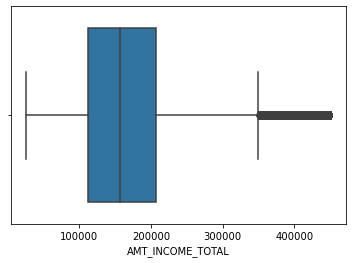

In [134]:
sns.boxplot(all_apps.AMT_INCOME_TOTAL)
plt.show()

## 5. Imbalance

In [135]:
# Checking for imbalance in the data
all_apps.TARGET.value_counts(normalize=True)

0    0.91337
1    0.08663
Name: TARGET, dtype: float64

#### Positive cases of payment difficulty is ~8.7% of the data. This counts as Moderate data imbalance according to <a href="https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data">this link</a>.
#### This imbalance would need to be corrected when moving to modeling.

## 6. Analysis

In [137]:
# Split the DataFrame into two based on TARGET variable
all_apps_no_diff = all_apps[all_apps['TARGET'] == 0]
all_apps_diff = all_apps[all_apps['TARGET'] == 1]

In [138]:
all_apps_diff.CODE_GENDER.sort_values()

712790    F
835244    F
835243    F
835179    F
835178    F
         ..
316970    M
316969    M
316968    M
317792    M
0         M
Name: CODE_GENDER, Length: 121699, dtype: object

In [139]:
all_apps_no_diff.CODE_GENDER.sort_values()

1           F
864323      F
864324      F
864325      F
864327      F
         ... 
165609    XNA
386919    XNA
386918    XNA
386916    XNA
179210    XNA
Name: CODE_GENDER, Length: 1283113, dtype: object

### 6.1 Univariate: Categorical

In [193]:
# Helper function to plot countplot for Categorical variable
no_diff_len = len(all_apps_no_diff)
diff_len = len(all_apps_diff)

sns.set_theme(style='darkgrid')

def plot_countplot(col, readable_name, as_cols=False):
    plt.style.use('fivethirtyeight')
    n_rows = 2 if as_cols else 1
    n_cols = 1 if as_cols else 2

    height = 15 if as_cols else 6
    
    rotation = 60 if as_cols else 30

    fig, (ax1, ax2) = plt.subplots(n_rows,n_cols,figsize=(20, height))

    order = sorted(set(all_apps_no_diff[col].values))

    plt.subplot(n_rows,n_cols,1)
    sns.countplot(data=all_apps_no_diff, x=col, ax=ax1, order=order)
    ax1.set_ylabel('Count')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotation, ha='right')
    plt.title(f'No payment difficulty - {readable_name}', fontweight='bold', fontsize=16)

    # Percentage annotation
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/no_diff_len)*100), (p.get_x() + 0.1, p.get_height()))

    plt.subplot(n_rows,n_cols,2)
    sns.countplot(data=all_apps_diff, x=col, ax=ax2, order=order)
    ax2.set_ylabel('Count')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=rotation, ha='right')
    plt.title(f'Payment difficulty - {readable_name}', fontweight='bold', fontsize=16)
    
    # Percentage annotation
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/diff_len)*100), (p.get_x() + 0.1, p.get_height()))

    plt.show()

In [194]:
def plot_pies(col, readable_name, show_legend=False):
    plt.style.use('fivethirtyeight')
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 7))

    # No difficulty
    plt.subplot(1,2,1)
    all_apps_no_diff.groupby(col)['TARGET'].count().plot(kind='pie', autopct='%.2f%%')
    ax1.set_ylabel('')
    if (show_legend):
        plt.legend(loc='lower right')
    plt.title(f'No payment difficulty - {readable_name}', fontweight='bold', fontsize=16)
    
    #Difficulty
    plt.subplot(1,2,2)
    all_apps_diff.groupby(col)['TARGET'].count().plot(kind='pie', autopct='%.2f%%')
    ax2.set_ylabel('')
    plt.title(f'Payment difficulty - {readable_name}', fontweight='bold', fontsize=16)
    if (show_legend):
        plt.legend(loc='lower right')

    plt.show()

#### 6.1.1 Gender

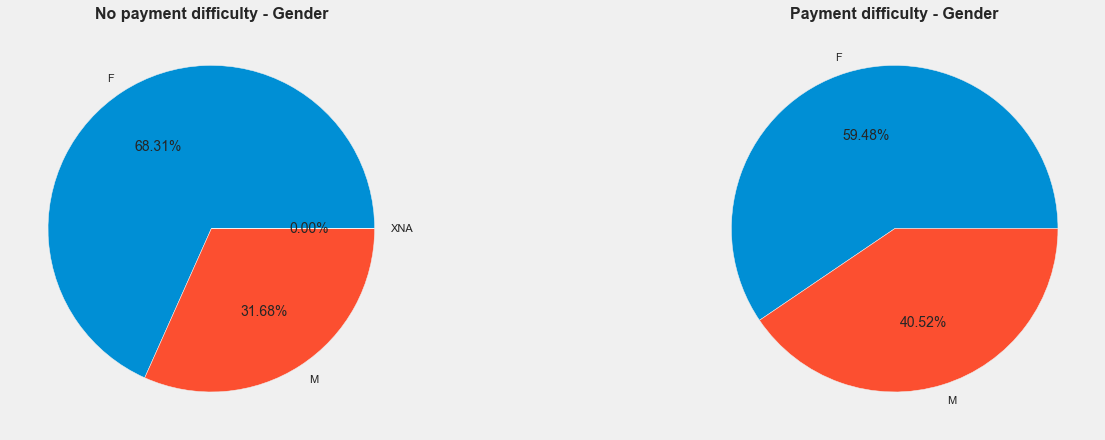

In [195]:
plot_pies('CODE_GENDER', 'Gender')

Number of women is greater than number of men in both cases.<br>
However, in terms of ratios, more men tend to have payment difficulties than women.

#### 6.1.2 Owning car

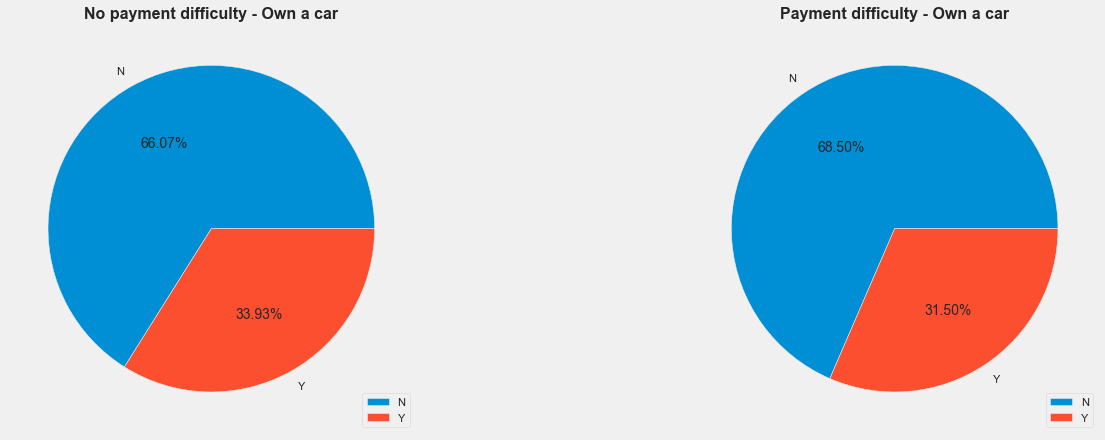

In [196]:
plot_pies('FLAG_OWN_CAR', 'Own a car', show_legend=True)

More people who do not own a car have payment difficulties than people who own a car.<br>
Amongst car owners, the number of people that have payment difficulties is slightly lesser than the number of people who do not.

In [197]:
# plot_countplot('FLAG_OWN_CAR', 'Own a car')

Similarly to gender, more people who own cars seem to apply for loans.<br>
More people who own cars have payment difficulties.

#### 6.1.3 Income type

In [198]:
# plot_pies('NAME_INCOME_TYPE', 'Income Type')
# Not drawing pie chart in this case due to issue with labels

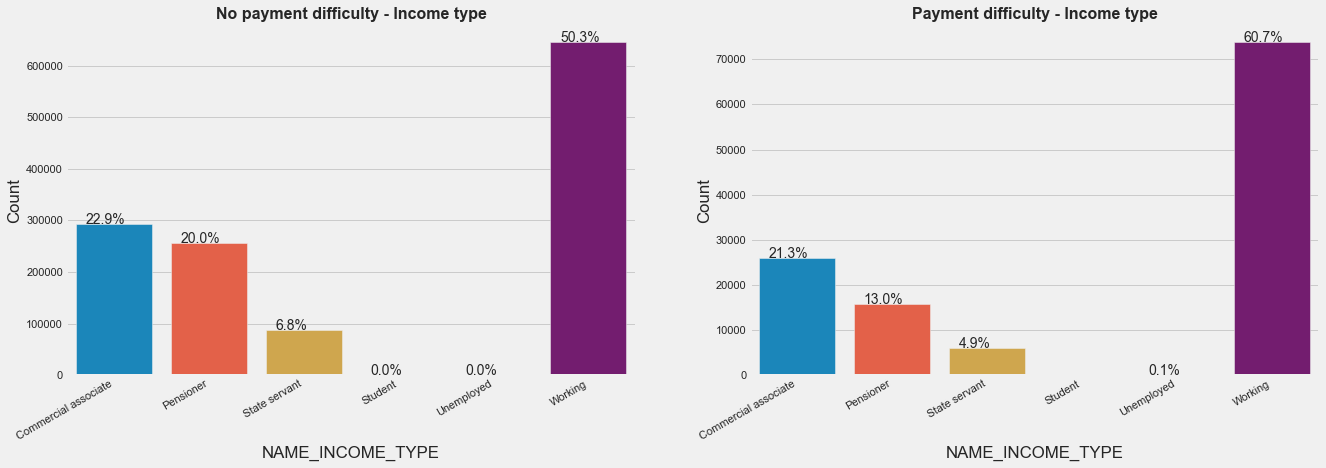

In [199]:
plot_countplot('NAME_INCOME_TYPE', 'Income type')

Working class people have more difficulty than any other income type.<br>
Some commercial associates and pensioners also have difficulties.

#### 6.1.4 Own Realty

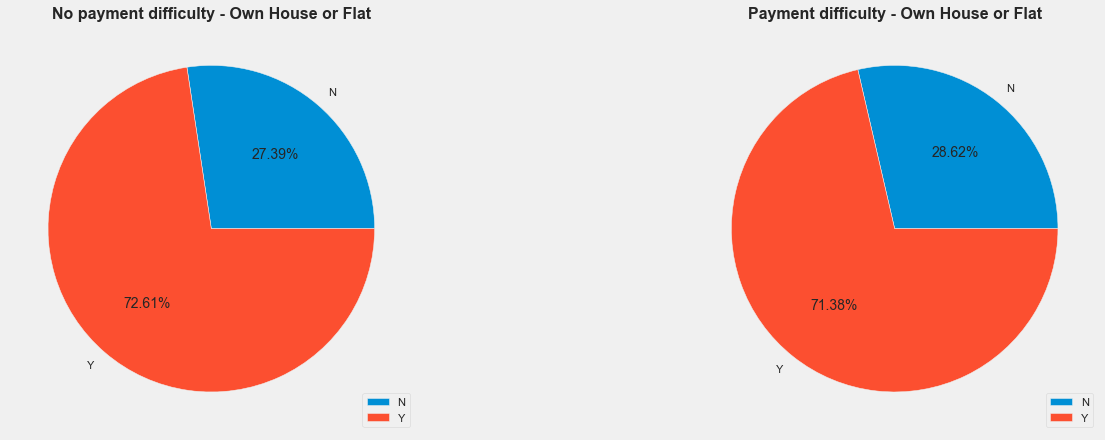

In [200]:
plot_pies('FLAG_OWN_REALTY', 'Own House or Flat', show_legend=True)

More people who own realty face difficulties in making payments than people who do not own realty.<br>
Amongst realty owners, slightly fewer people face payment difficulties.

In [201]:
# plot_countplot('FLAG_OWN_REALTY')

#### 6.1.5 Family status

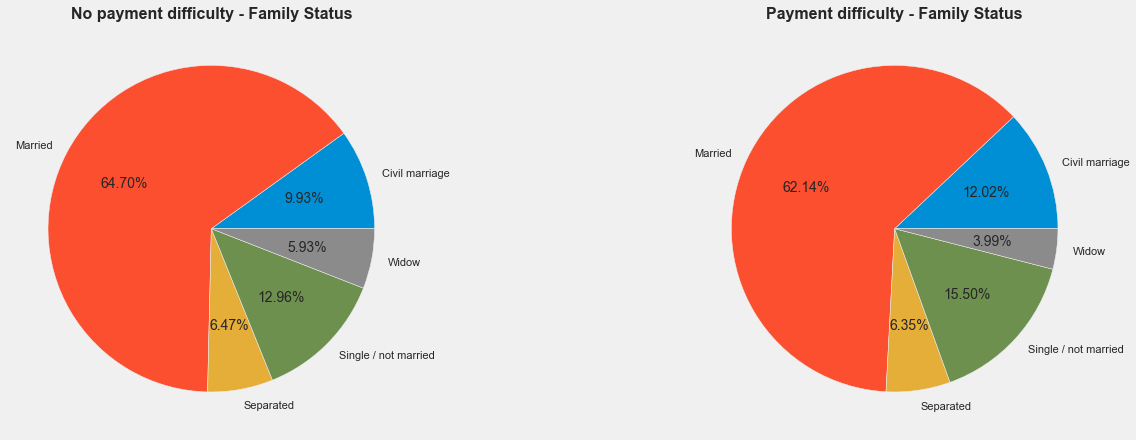

In [202]:
plot_pies('NAME_FAMILY_STATUS', 'Family Status')

Amongst people with payment difficulties, Married people is the largest group. However, slightly fewer number of married people have payment difficulties.<br>
Single people and people with civil marriage tend to have payment difficulties more often than not.<br>
For widows and separated people, the reverse is true, possibly because they have been bequeathed money from their former spouse.

In [203]:
# plot_countplot('NAME_FAMILY_STATUS')

#### 6.1.6 Education Type

In [204]:
# plot_pies('NAME_EDUCATION_TYPE', 'Education Type', show_legend=True)

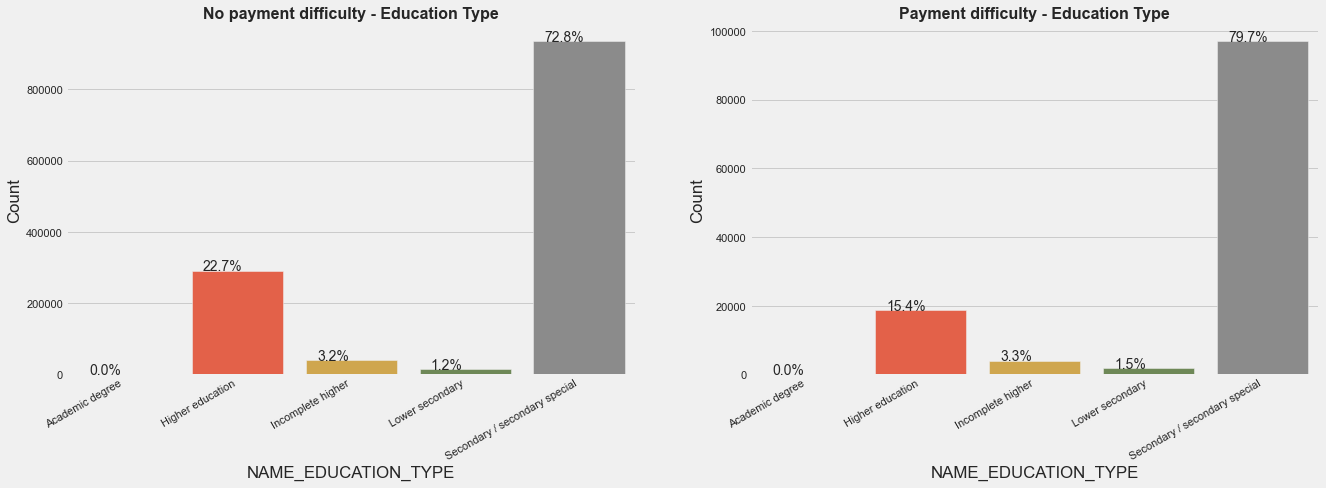

In [205]:
plot_countplot('NAME_EDUCATION_TYPE', 'Education Type')

Amongst people with Higher education, fewer people have payment difficulties.<br>
People with Secondary education have payment difficulties more than any other group. Amongst people with Secondary education, more people have payment difficulties than not.

#### 6.1.7 Accompanied by

In [206]:
# plot_pies('NAME_TYPE_SUITE', 'Accompanied by')

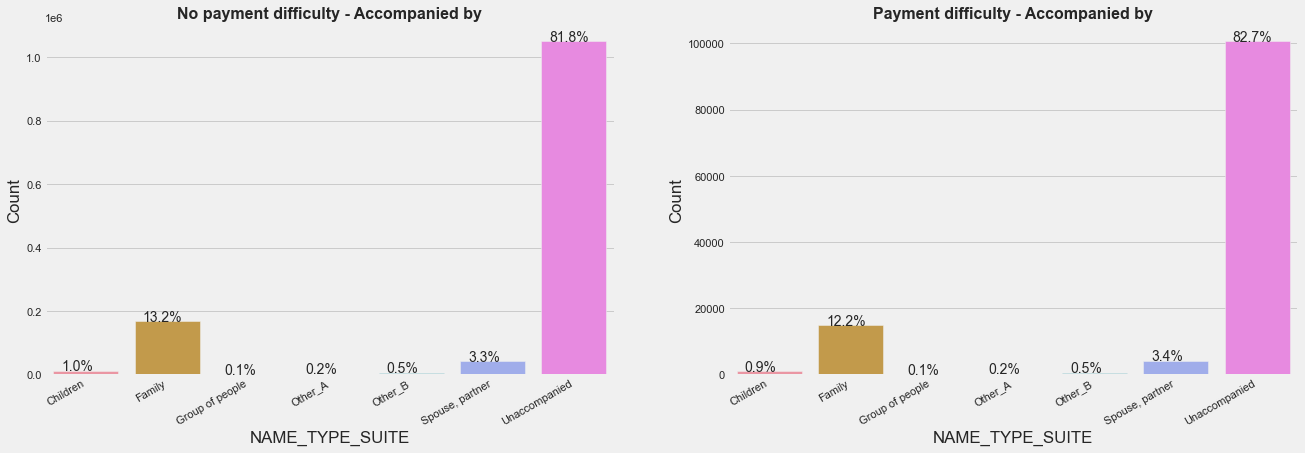

In [207]:
plot_countplot('NAME_TYPE_SUITE', 'Accompanied by')

Unaccompanied people are more likely to have payment difficulties<br>
People accompanied by Family are slightly less likely to have payment difficulties

#### 6.1.8 Housing type

In [208]:
# plot_pies('NAME_HOUSING_TYPE', 'Housing type')

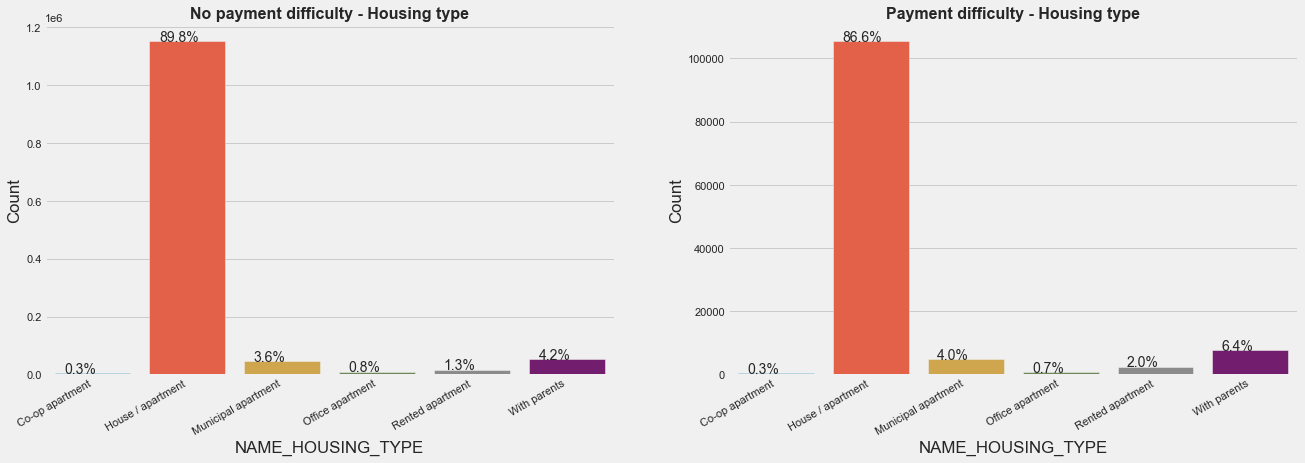

In [209]:
plot_countplot('NAME_HOUSING_TYPE', 'Housing type')

People who live with parents are more likely to have payment difficulties.<br>
People who live in municipal apartments and rented apartments are slightly more likely to have payment difficulties.<br>
The majority of people do not fall under the above categories, and they are less likely to have payment difficulties than not.

#### 6.1.9 Occupation type

In [210]:
# plot_pies('OCCUPATION_TYPE', 'Occupation Type')

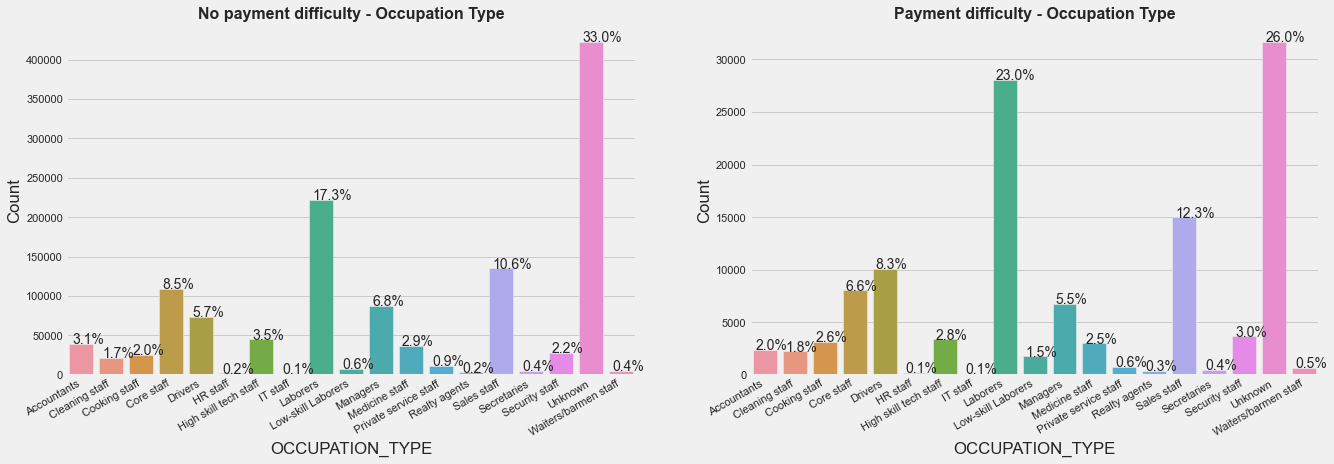

In [211]:
plot_countplot('OCCUPATION_TYPE', 'Occupation Type')

People with jobs that pay high salaries i.e., Accountants, Core staff, HR staff, High skill tech staff, IT staff, Managers, Medicine staff, Private service staff are less likely to face payment difficulties.<br>
People in other professions that do not pay as well as the above jobs i.e., Cleaning staff, Cooking staff, Drivers, Laborers, Low-skill Laborers, Realty agents, Sales staff, Security staff, Waiters are more likely to face payment difficulties.

#### 6.1.10 Contract type

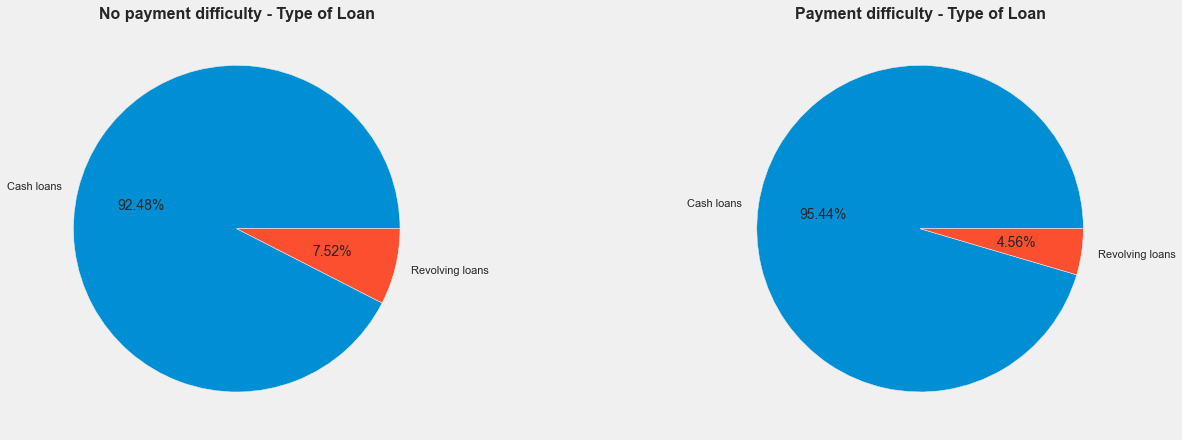

In [212]:
plot_pies('NAME_CONTRACT_TYPE', 'Type of Loan')

People who take revolving loans are less likely to face payment difficulties than people who take Cash loans.

### 6.2 Univariate: Numeric

Univariate analysis may be performed on the following numeric variables:
* AMT_INCOME_TOTAL
* AMT_CREDIT
* AMT_ANNUITY
* REGION_POPULATION_RELATIVE
* OWN_CAR_AGE - Since we checked Car in Categorical analysis
* EXT_SOURCE_1
* EXT_SOURCE_2
* EXT_SOURCE_3

In [213]:
all_apps_diff.AMT_INCOME_TOTAL.value_counts(normalize=True)

135000.0    0.115071
112500.0    0.099754
157500.0    0.098053
180000.0    0.088012
225000.0    0.072112
              ...   
28575.0     0.000008
293625.0    0.000008
46350.0     0.000008
37350.0     0.000008
52425.0     0.000008
Name: AMT_INCOME_TOTAL, Length: 330, dtype: float64

In [214]:
all_apps_diff.AMT_INCOME_TOTAL.dtype

dtype('float64')

In [215]:
all_apps_diff[all_apps_diff.AMT_INCOME_TOTAL==0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


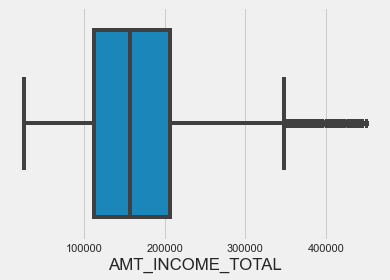

In [216]:
sns.boxplot(all_apps.AMT_INCOME_TOTAL)
plt.show()

#### 6.2.1. AMT_INCOME_TOTAL

In [224]:
def plot_distplot(col, readable_name):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    plt.subplot(2,1,1)
    ax1.set(xlabel=readable_name)
    plt.title(f'Distribution of {readable_name} - Payment difficulty')
    sns.distplot(all_apps_diff[col], hist=False, ax=ax1)

    plt.subplot(2,1,2)
    plt.title(f'Distribution of {readable_name} - No Payment difficulty')
    ax2.set(xlabel=readable_name)
    sns.distplot(all_apps_no_diff[col], hist=False, ax=ax2)
    plt.show()

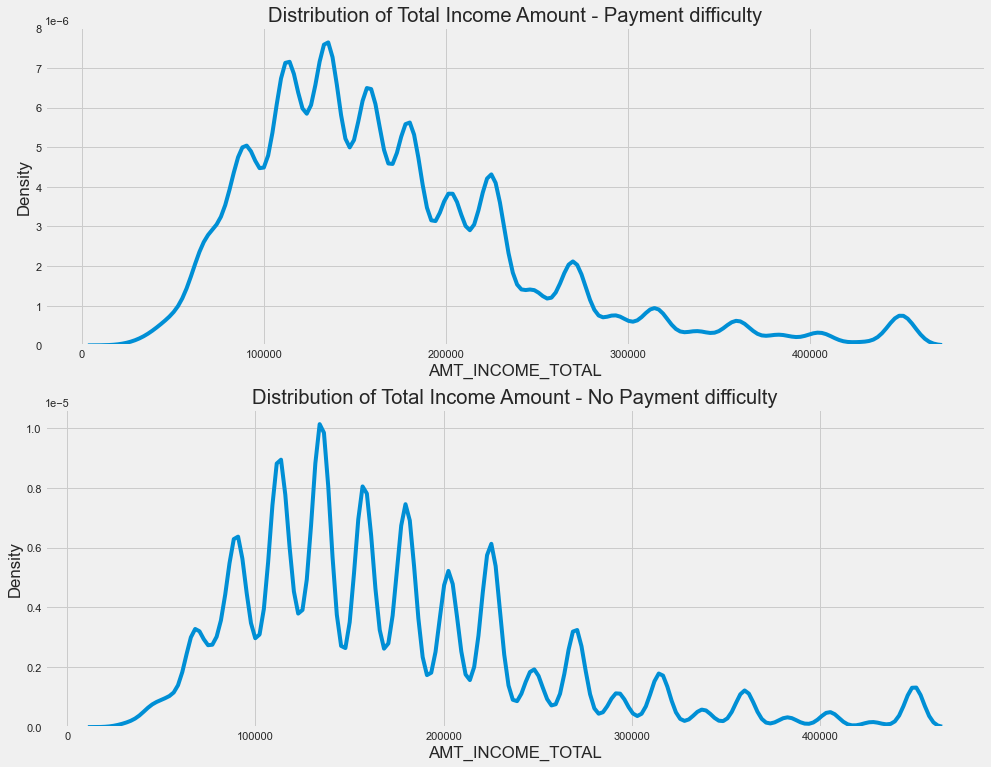

In [225]:
plot_distplot('AMT_INCOME_TOTAL', 'Total Income Amount')

People with income of less than 120000 are very likely to face difficulty in payment.<br>The likelihood decreases with increasing income amount upto 300000, at which point people are very unlikely to face difficulty.

#### 6.2.2. AMT_ANNUITY

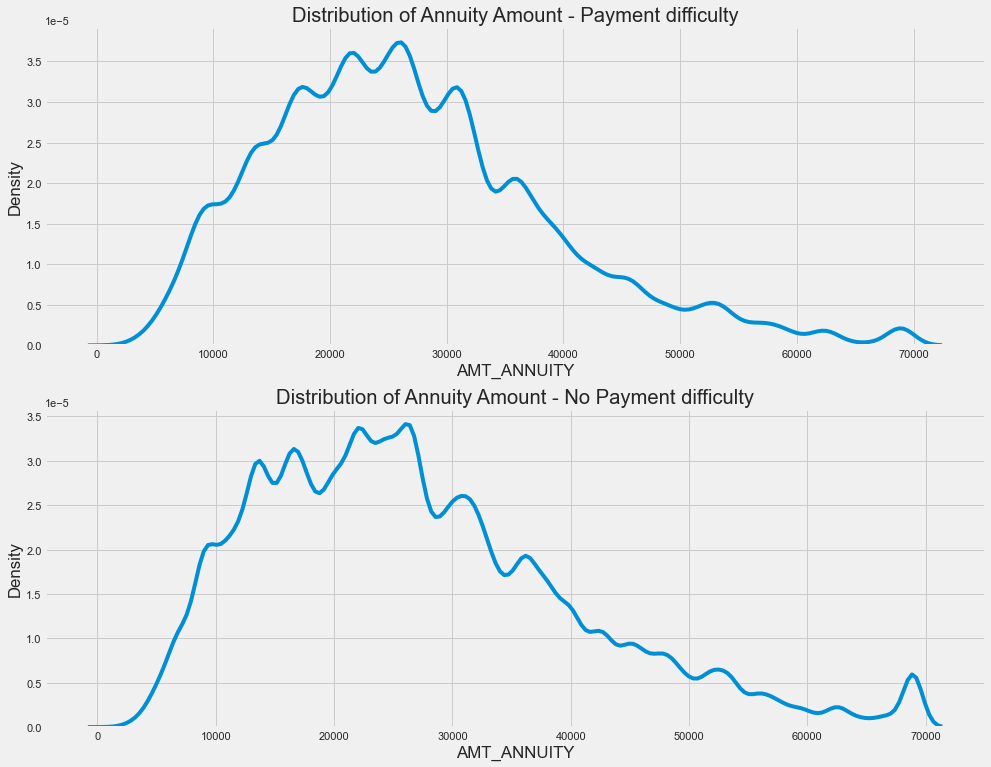

In [229]:
plot_distplot('AMT_ANNUITY', 'Annuity Amount')

Most of the people facing difficulty in payments have annuity amount ranging from 17,000 to 27,000.

#### 6.2.3. REGION_POPULATION_RELATIVE

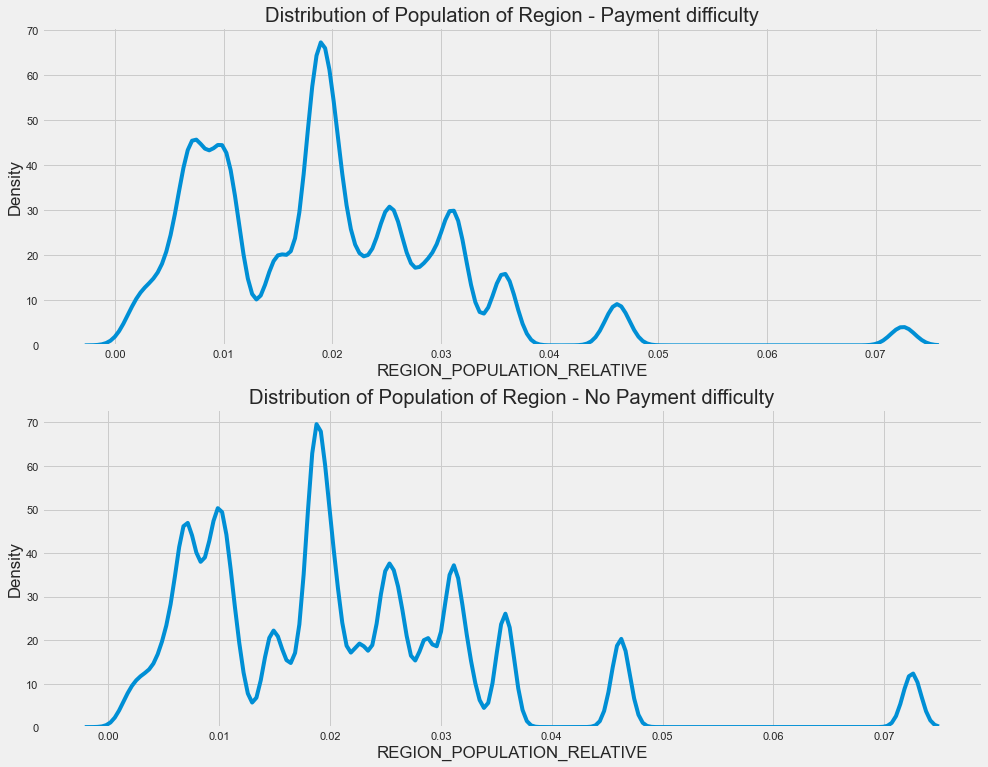

In [232]:
plot_distplot('REGION_POPULATION_RELATIVE', 'Population of Region')

Most of the people who face payment difficulties live in regions with normalized density of less tha 0.02

#### 6.2.4. EXT_SOURCE_2

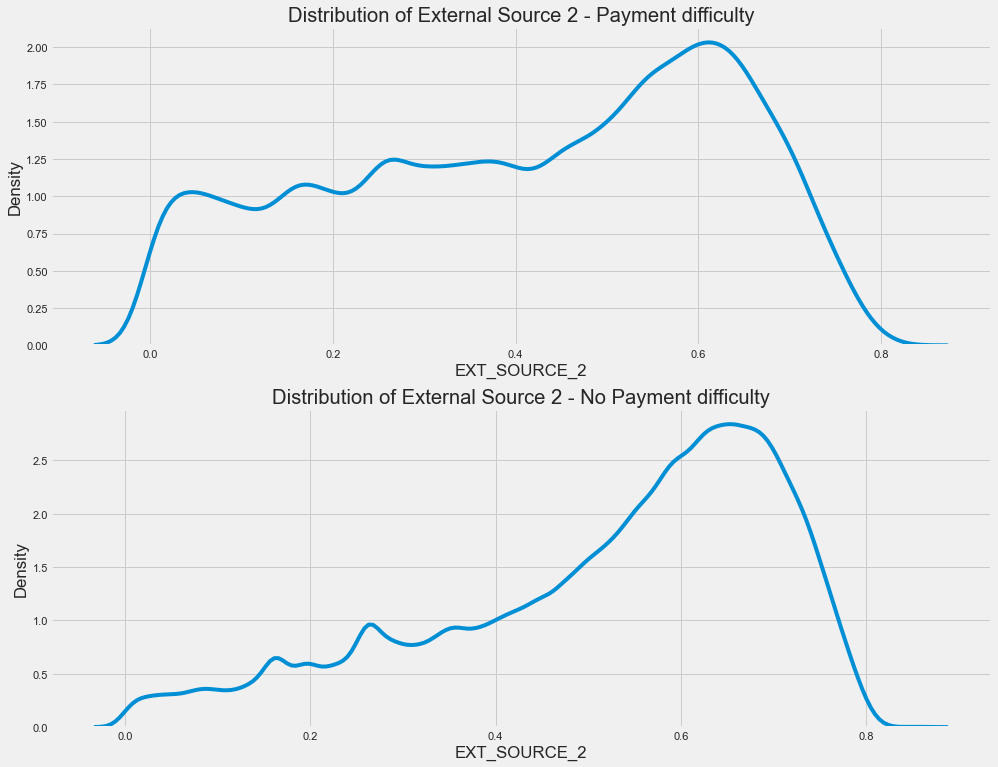

In [237]:
plot_distplot('EXT_SOURCE_2', 'External Source 2')

The majority of people facing difficulty received a score of 0.6 from Source 2.<br>
However, people with scores of 0.4 or less in Source 2 are more likely to face difficulty than not.

#### 6.2.5. EXT_SOURCE_3

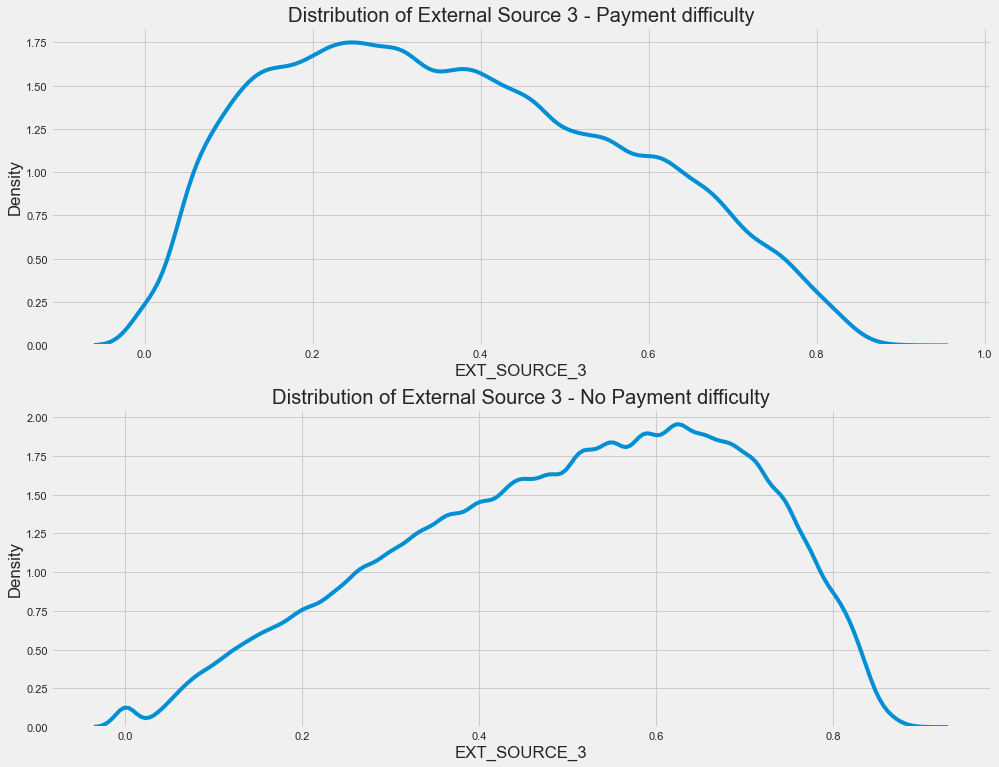

In [238]:
plot_distplot('EXT_SOURCE_3', 'External Source 3')

People with score of less than 0.45 from Source 3 are more likely to face difficulty than not.

### 6.3 Univariate: Segmented Numeric

Univariate analysis may be performed on the following binned variables:
* CNT_FAM_MEMBERS
* CNT_CHILDREN
* DEF_30_CNT_SOCIAL_CIRCLE
* OBS_30_CNT_SOCIAL_CIRCLE
* OBS_60_CNT_SOCIAL_CIRCLE
* DEF_60_CNT_SOCIAL_CIRCLE

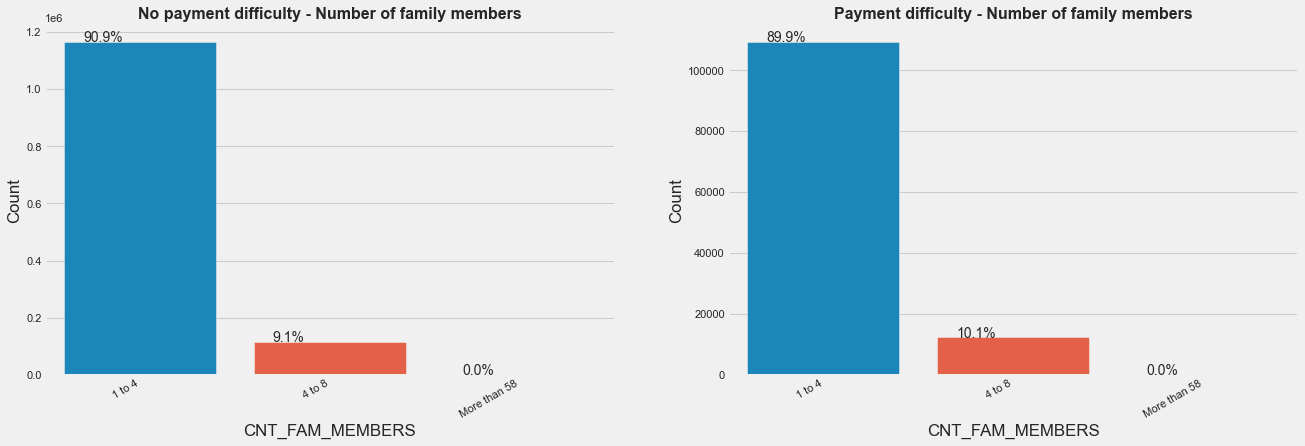

In [239]:
plot_countplot('CNT_FAM_MEMBERS', 'Number of family members')